In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:] # the first ':' indicates that it will take all the 
                     #rows and '2:' indicates that \n take the column starting from index 2 to end


In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
316,54,104000,1
357,41,72000,0
114,42,80000,0
9,35,65000,0
390,48,33000,1


# Train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis= 1),
                                                 df['Purchased'],test_size = 0.3,random_state = 0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [13]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


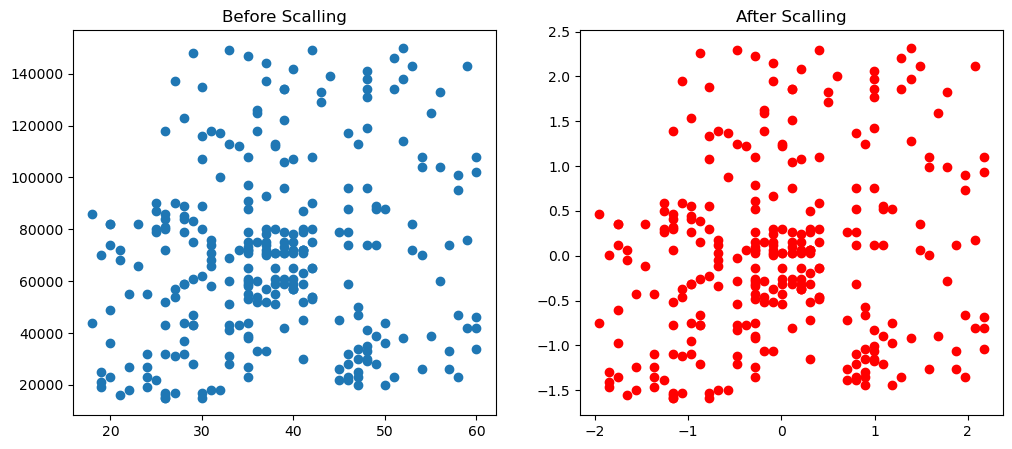

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scalling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scalling")
plt.show()

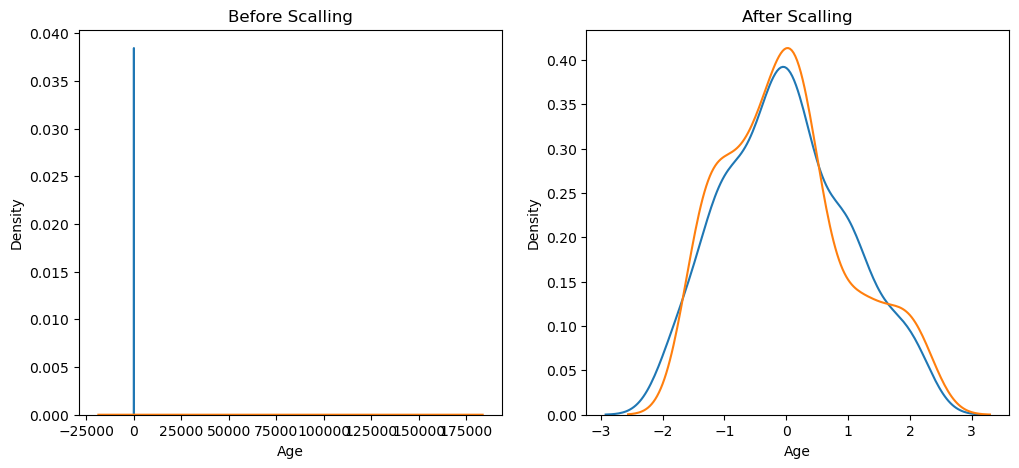

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#Before scalling
ax1.set_title("Before Scalling")
sns.kdeplot(X_train['Age'],ax= ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

#After Scalling
ax2.set_title("After Scalling")
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()


# Why scaling is important

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [33]:
y_prep = lr.predict(X_test)
y_prep_scaled = lr_scaled.predict(X_test_scaled)

In [34]:
from sklearn.metrics import accuracy_score

In [37]:
print("Acutual", accuracy_score(y_test,y_prep))
print("Scaled",accuracy_score(y_test,y_prep_scaled))

Acutual 0.6583333333333333
Scaled 0.8666666666666667


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [41]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [42]:
y_prep = dt.predict(X_test)
y_prep_scaled = dt_scaled.predict(X_test_scaled)

In [44]:
print("Actual",accuracy_score(y_test,y_prep))
print("Scaled",accuracy_score(y_test,y_prep_scaled))

Actual 0.875
Scaled 0.875


In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [46]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\expert\AppData\Local\Temp\ipykernel_9896\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [47]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


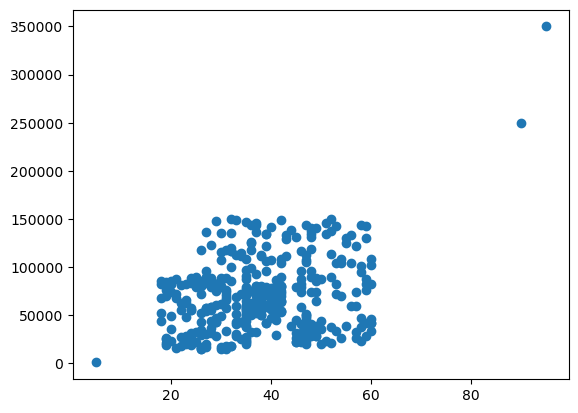

In [49]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

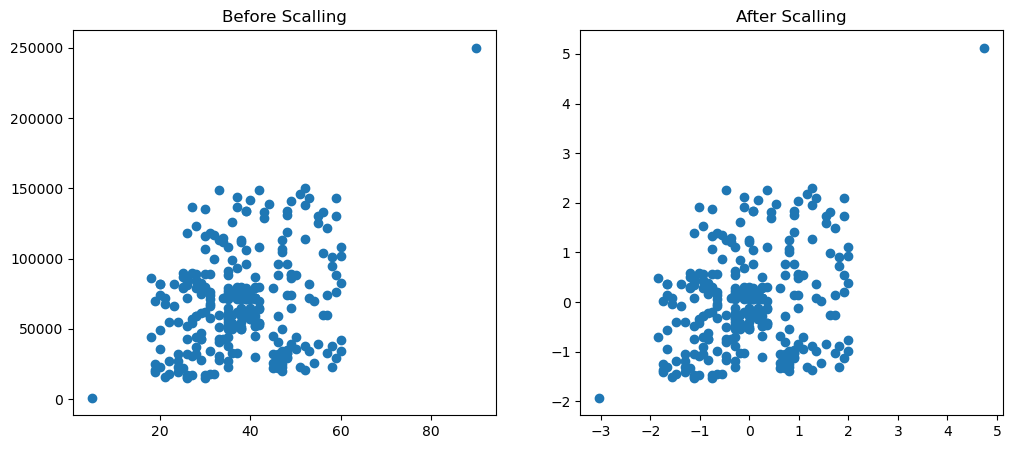

In [58]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scalling")
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax2.set_title("After Scalling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
plt.show()